# Try to fit an ARIMA model

In [1]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 6.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('/content/drive/Othercomputers/My MacBook Pro/KJY/Data Science/Data_Scientist_Position_at_Etiqa_Insurance_Singapore/0-df.pkl')

In [3]:
df

,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,month,year,000 calls,new_calls
date,,,,,,,,,,,
2013-01-01,2429,2,NaN,NaN,NaN,NaN,NaN,1,2013,2.429,2.429
2013-01-02,3881,3,NaN,NaN,NaN,NaN,NaN,1,2013,3.881,3.881
2013-01-03,3560,4,NaN,NaN,NaN,NaN,NaN,1,2013,3.560,3.560
2013-01-04,3155,5,NaN,NaN,NaN,NaN,NaN,1,2013,3.155,3.155
2013-01-05,1538,6,NaN,NaN,NaN,NaN,NaN,1,2013,1.538,1.538
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,5690,4,4713.0,33309.0,0.0,0.0,0.0,2,2016,5.690,5.690
2016-02-26,5799,5,5204.0,34350.0,0.0,0.0,0.0,2,2016,5.799,5.799
2016-02-27,3949,6,5135.0,23656.0,0.0,0.0,0.0,2,2016,3.949,3.949


# Data processing
- first difference
- log data

In [4]:
df['1st_dif'] = df['calls'].diff()

In [5]:
df['log_calls'] = np.log(df['calls'])

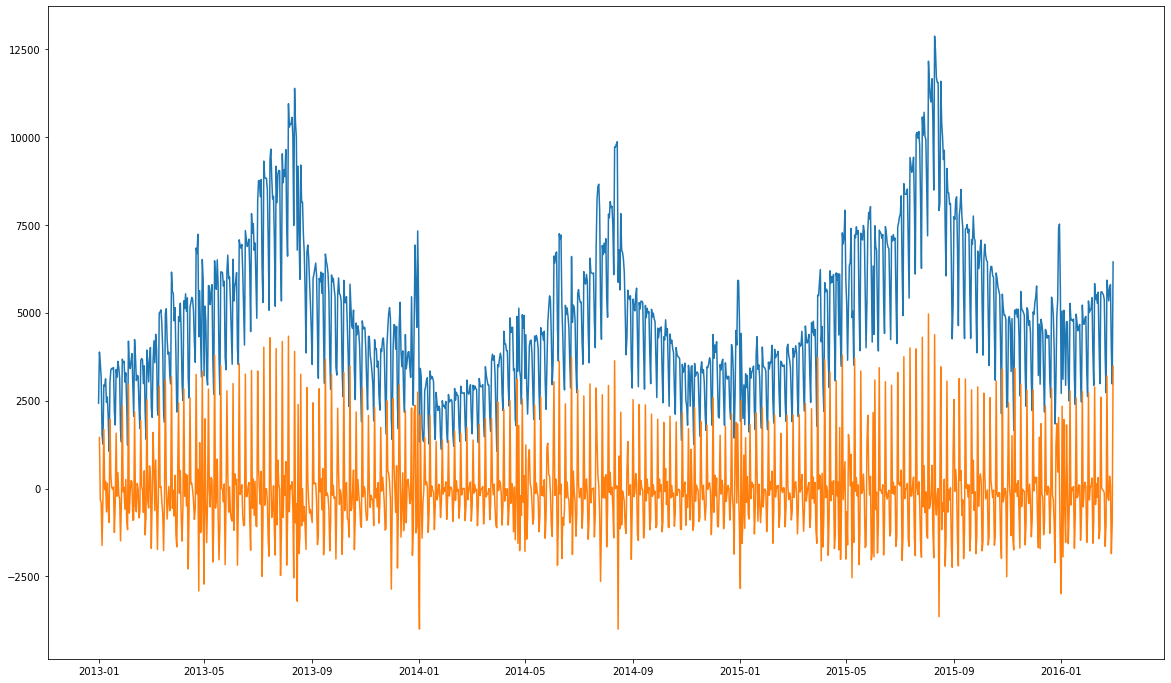

In [6]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.index, df['calls'])
ax.plot(df.index, df['1st_dif'])
plt.show()


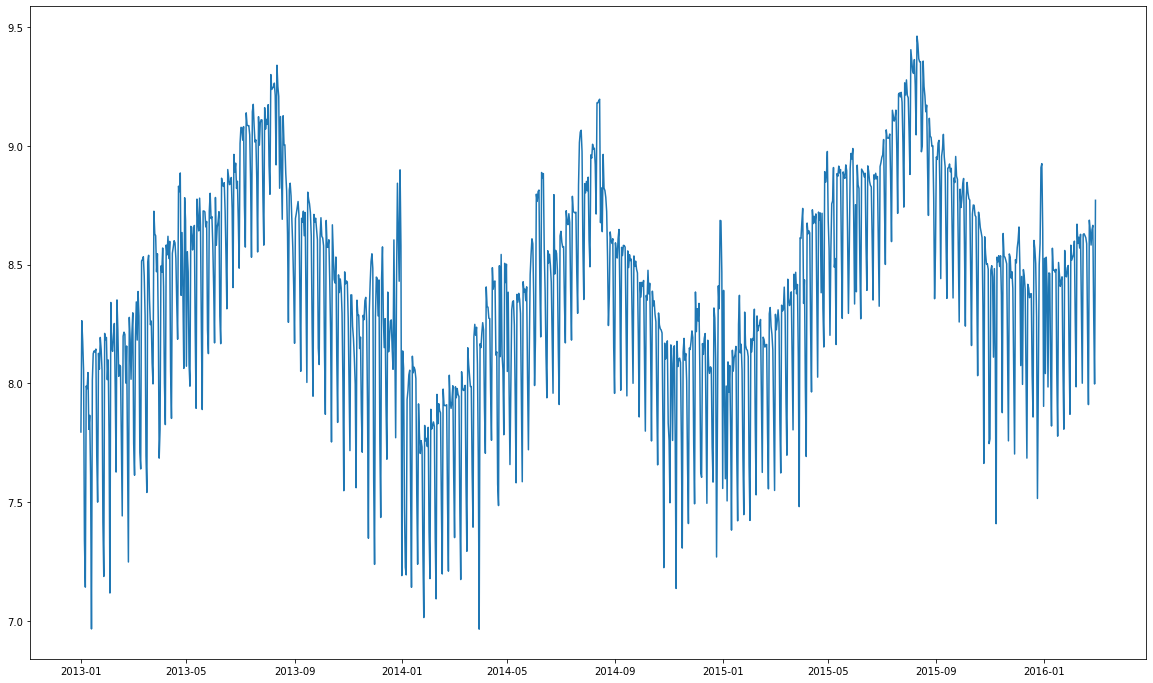

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df.index, df['log_calls'])
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

#df.index.freq = 'MS'

Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [9]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [10]:
arima = ARIMA(train['calls'], order=(1,0,0))
arima_result = arima.fit()
df.loc[train_idx, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


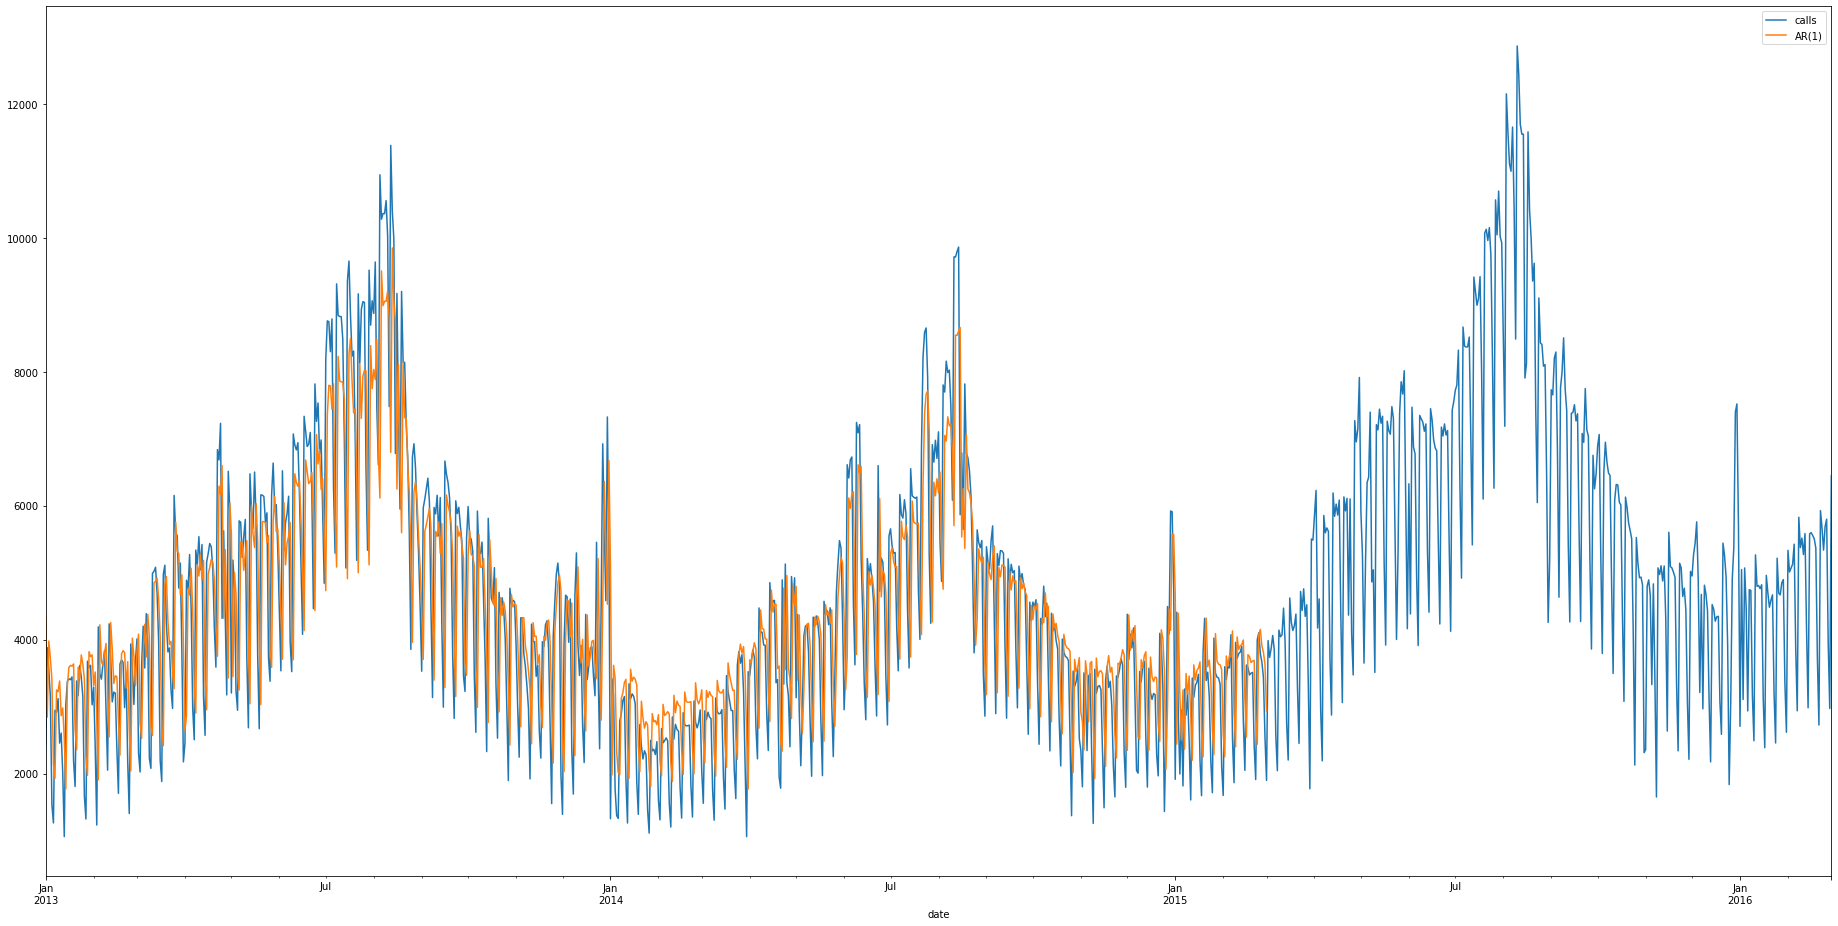

In [11]:
df[['calls', 'AR(1)']].plot(figsize=(32,16))

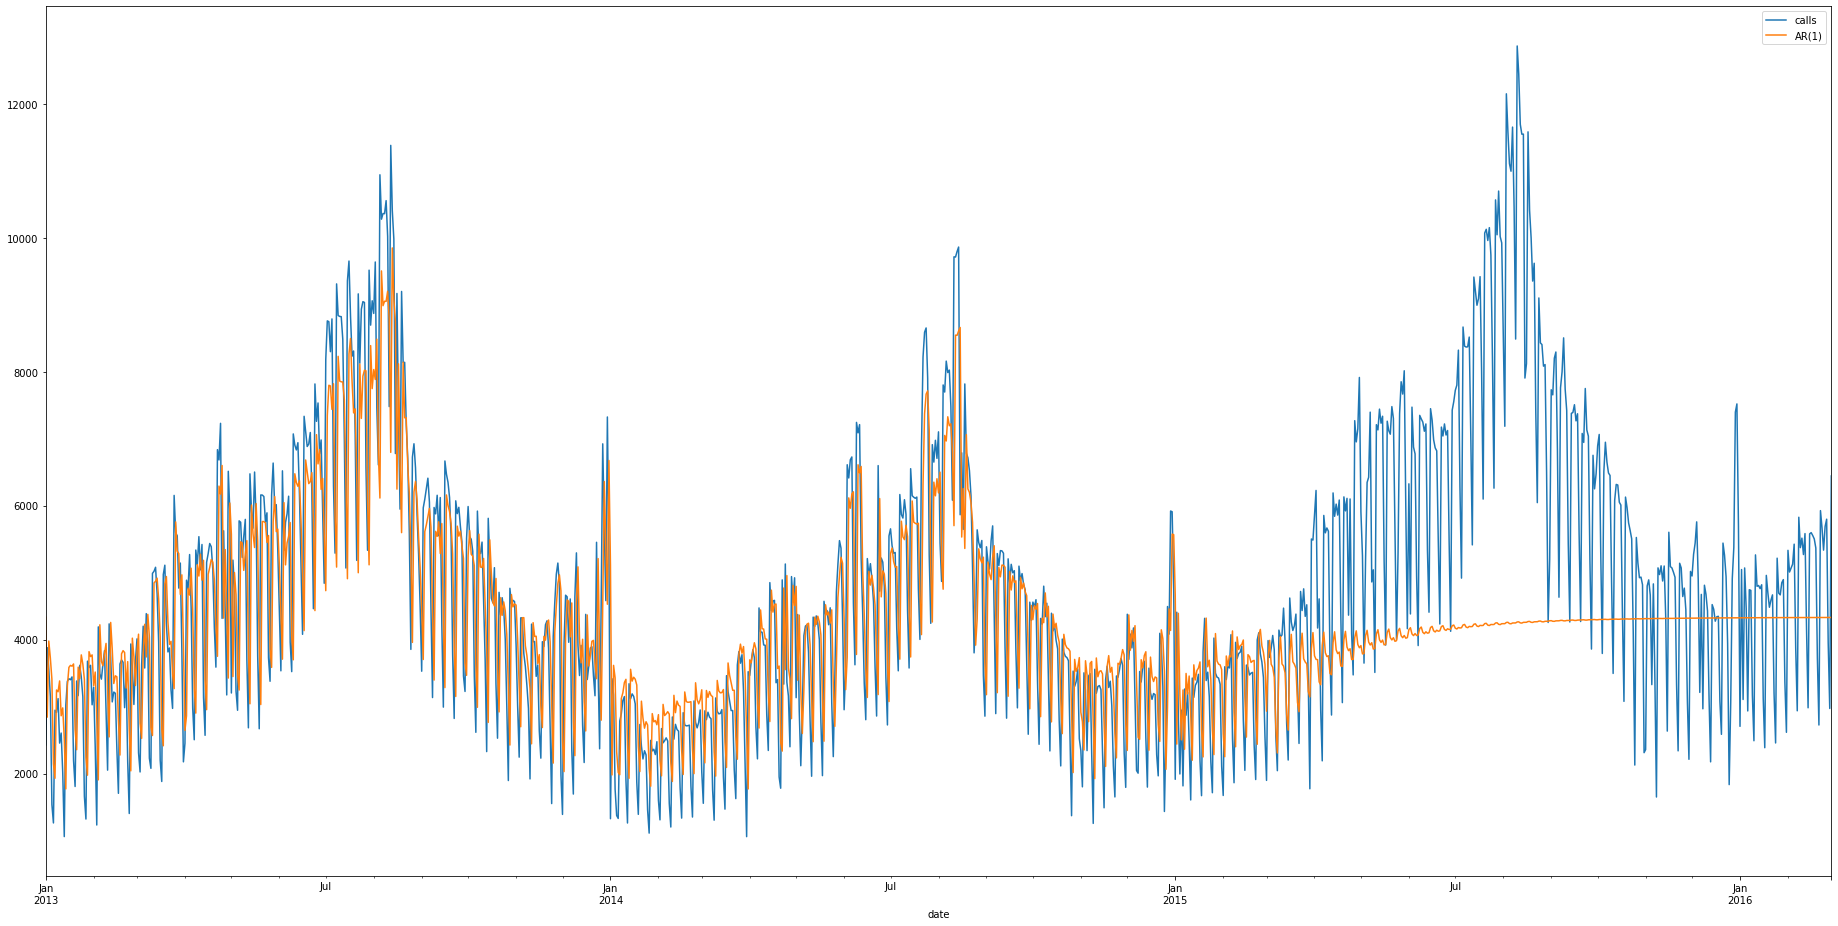

In [29]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast
df[['calls', 'AR(1)']].plot(figsize=(32,16))

In [35]:
# create a function to plot and forecast the ARIMA
def plot_fit_forecast(result, d, col='calls'):
  """to create a data, model and forecast plot in a same chart"""
  fig, ax = plt.subplots(figsize=(32, 16))
  ax.plot(df[col], label='data')

  # plot the fitted graph on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])
  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.2)
  ax.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


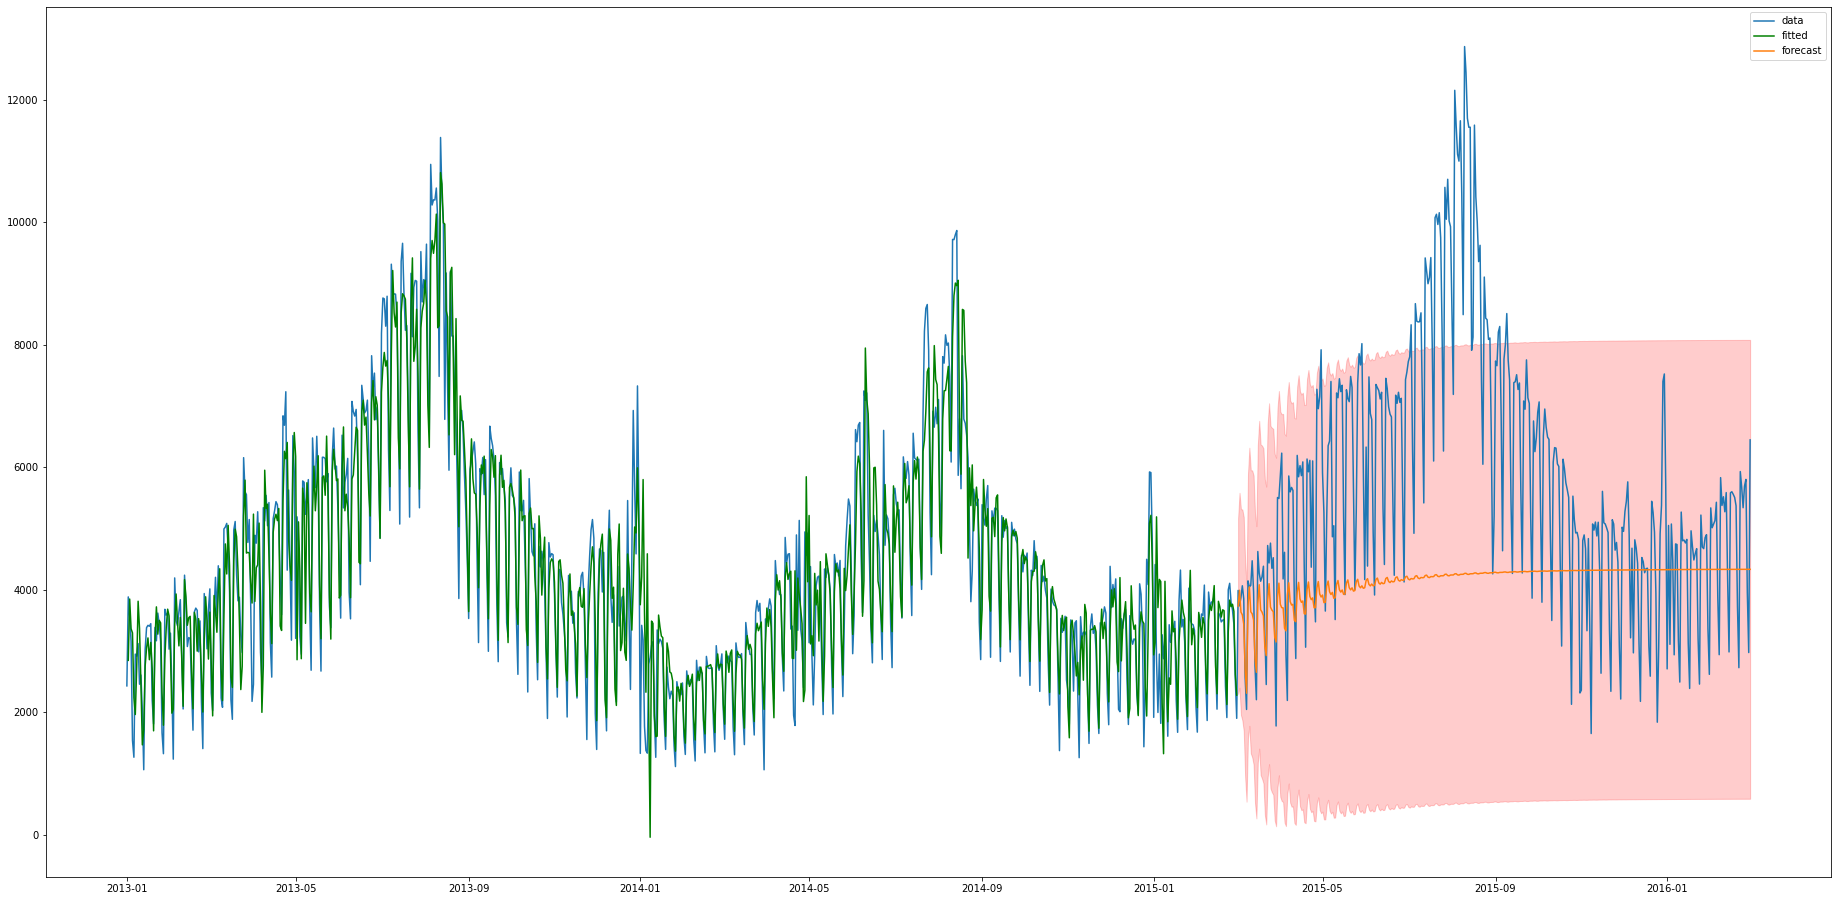

In [37]:
# try on AR(10)
arima = ARIMA(train['calls'], order=(10,0,0))
arima_result = arima.fit()
plot_fit_forecast(arima_result, 1, 'calls')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceW

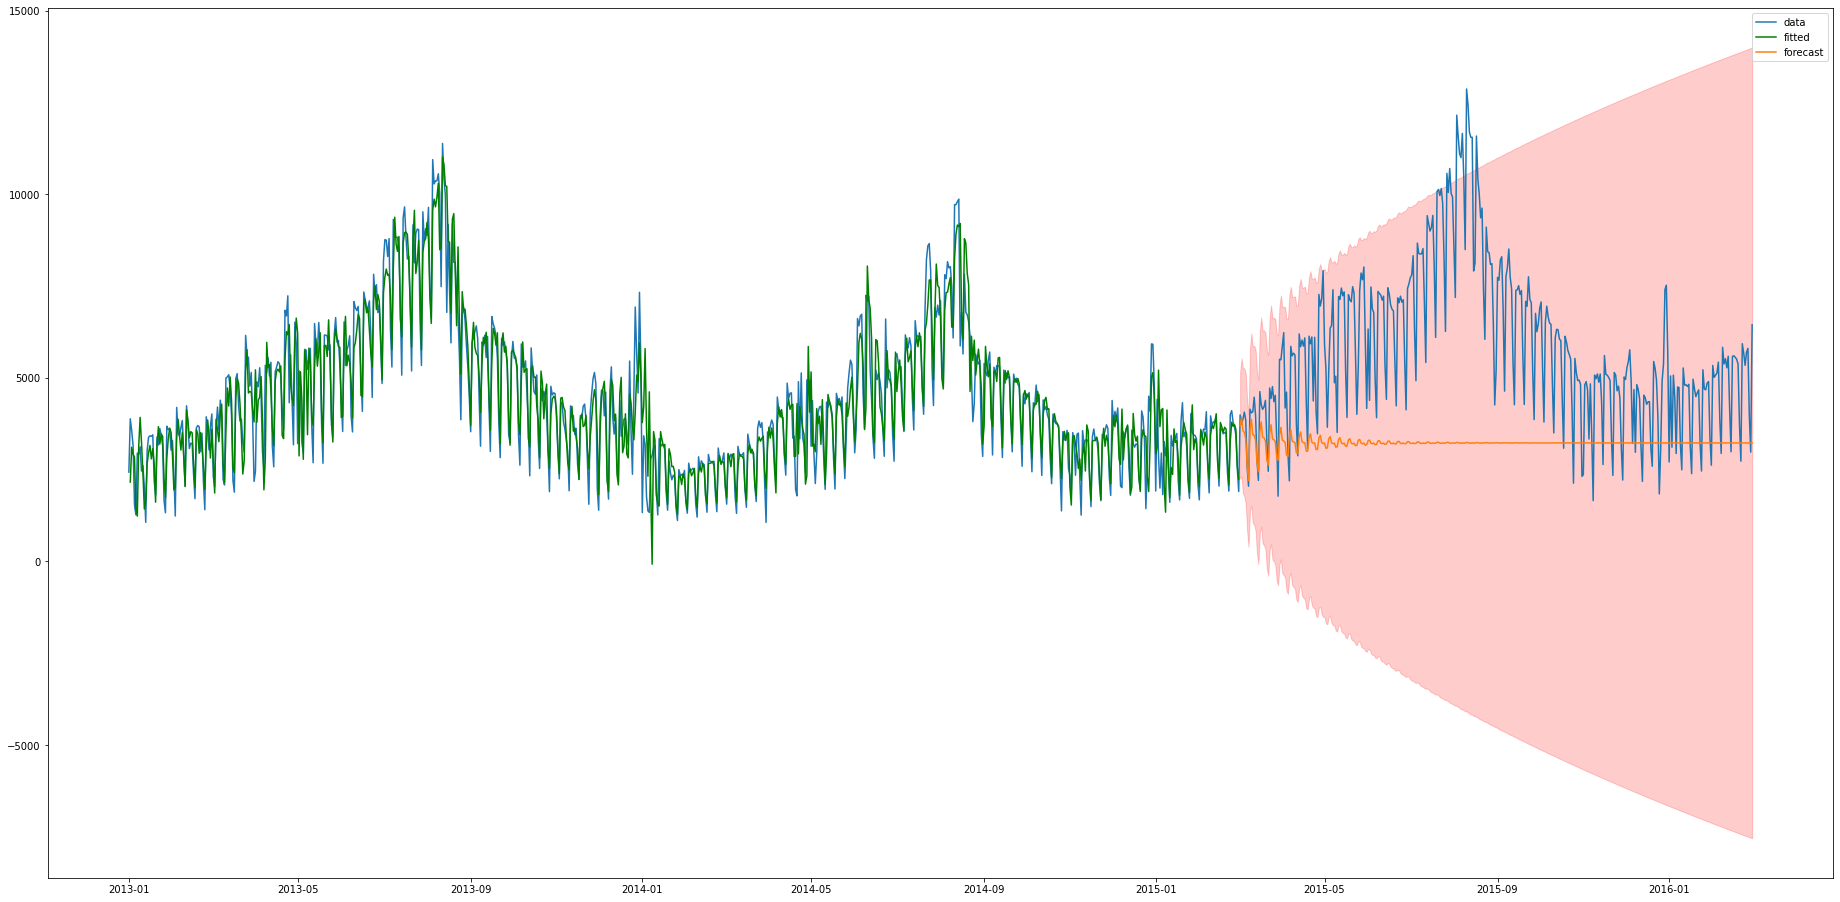

In [38]:
# try on another ARIMA model
arima = ARIMA(train['calls'], order=(8,1,1))
arima_result_811 = arima.fit()
plot_fit_forecast(arima_result_811, 1, 'calls')

# Suspecting code error, will proceed to another ARIMA model in the next section
- using pmd auto arima function

In [30]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.6 MB/s 


In [31]:
import pmdarima as pm

model = pm.auto_arima(train['calls'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13266.781, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13518.536, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13493.425, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13367.684, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13516.537, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13265.787, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13264.560, Time=0.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13265.293, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13294.568, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13248.166, Time=1.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13064.090, Time=1.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13097.717, Time=2.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13180.613, Time=2.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13218.926, Time=1.91 sec
 ARIMA(3,1,2)(0,0,0

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  790
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6525.037
Date:                Mon, 13 Dec 2021   AIC                          13062.075
Time:                        07:48:13   BIC                          13090.099
Sample:                             0   HQIC                         13072.847
                                - 790                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2462      0.002    587.895      0.000       1.242       1.250
ar.L2         -0.9986      0.002   -504.499      0.000      -1.003      -0.995
ma.L1         -1.9857      0.035    -56.389      0.000      -2.055      -1.917
ma.L2          1.8971      0.050     37.642      0.000       1.798       1.996
ma.L3         -0.7329      0.036    -20.103      0.000      -0.804      -0.661
sigma2      1.218e+06   6.57e-09   1.85e+14      0.000    1.22e+06    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                76.43
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.83e+29. Standard errors may be unstable.
"""

In [33]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

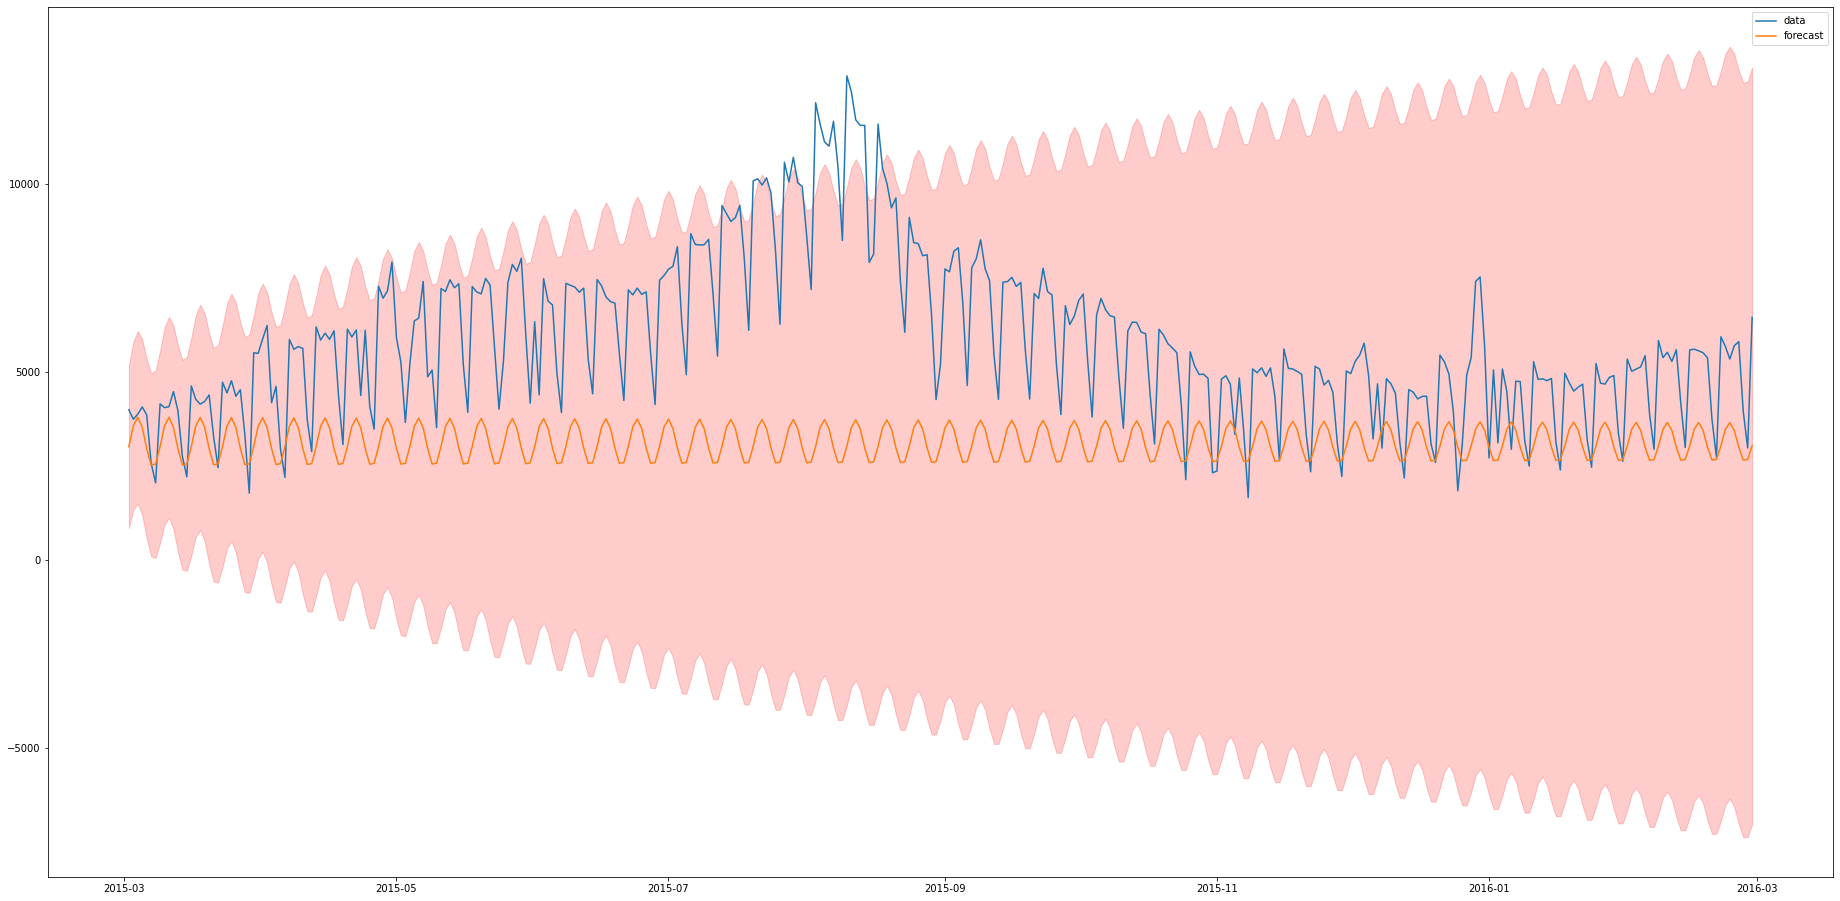

In [34]:
fig, ax = plt.subplots(figsize=(32, 16))
ax.plot(test.index, test['calls'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.2)
ax.legend()